In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [39]:
energy_df = pd.read_csv('Energy_consumption.csv')
display(energy_df.shape)
energy_df.head()

(1000, 11)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [40]:
def plot_series(df = None, column = None, series = pd.Series([]),
                label = None, ylabel = None, title = None, start = 0, end = None):
    sns.set()
    fig,ax = plt.subplots(figsize = (30,12))
    ax.set_title('Time', fontsize = 30)
    if column:
        ax.plot(df[column][start:end], label = label)
        ax.set_ylabel(ylabel, fontsize = 30)
        if series.any():
            ax.plot(series, label = label)
            ax.set_ylabel(ylabel, fontsize = 30)
            if label:
                ax.legend(fontsize = 16)
                if title:
                    ax.set_title(title, fontsize = 24)
                    ax.grid(True)
                    return ax

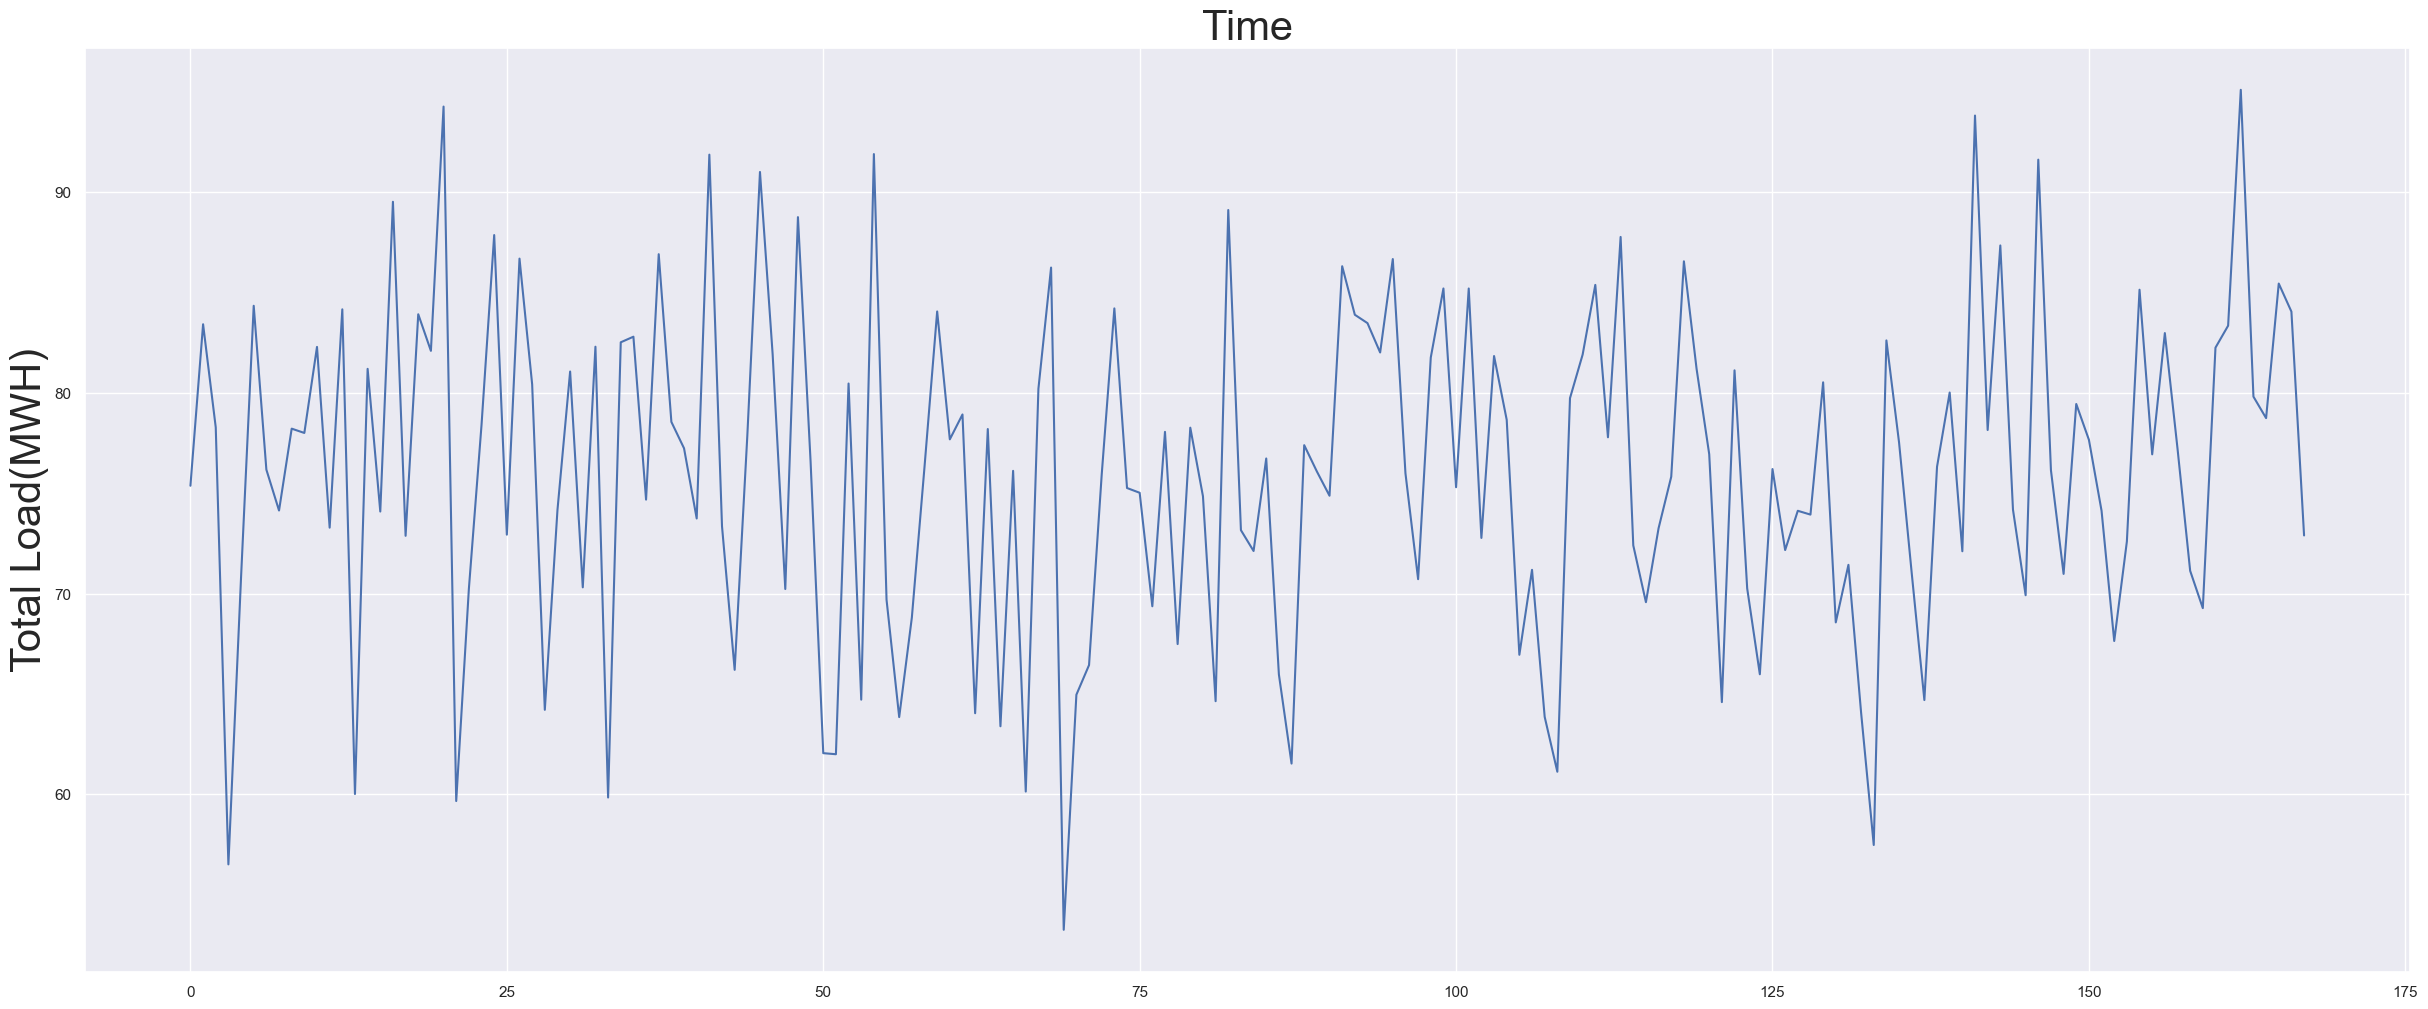

In [41]:
ax = plot_series(df = energy_df, column = 'EnergyConsumption', ylabel = 'Total Load(MWH)',
                 title = 'Energy consumption in (1st one week)', end = 24*7)
plt.show()

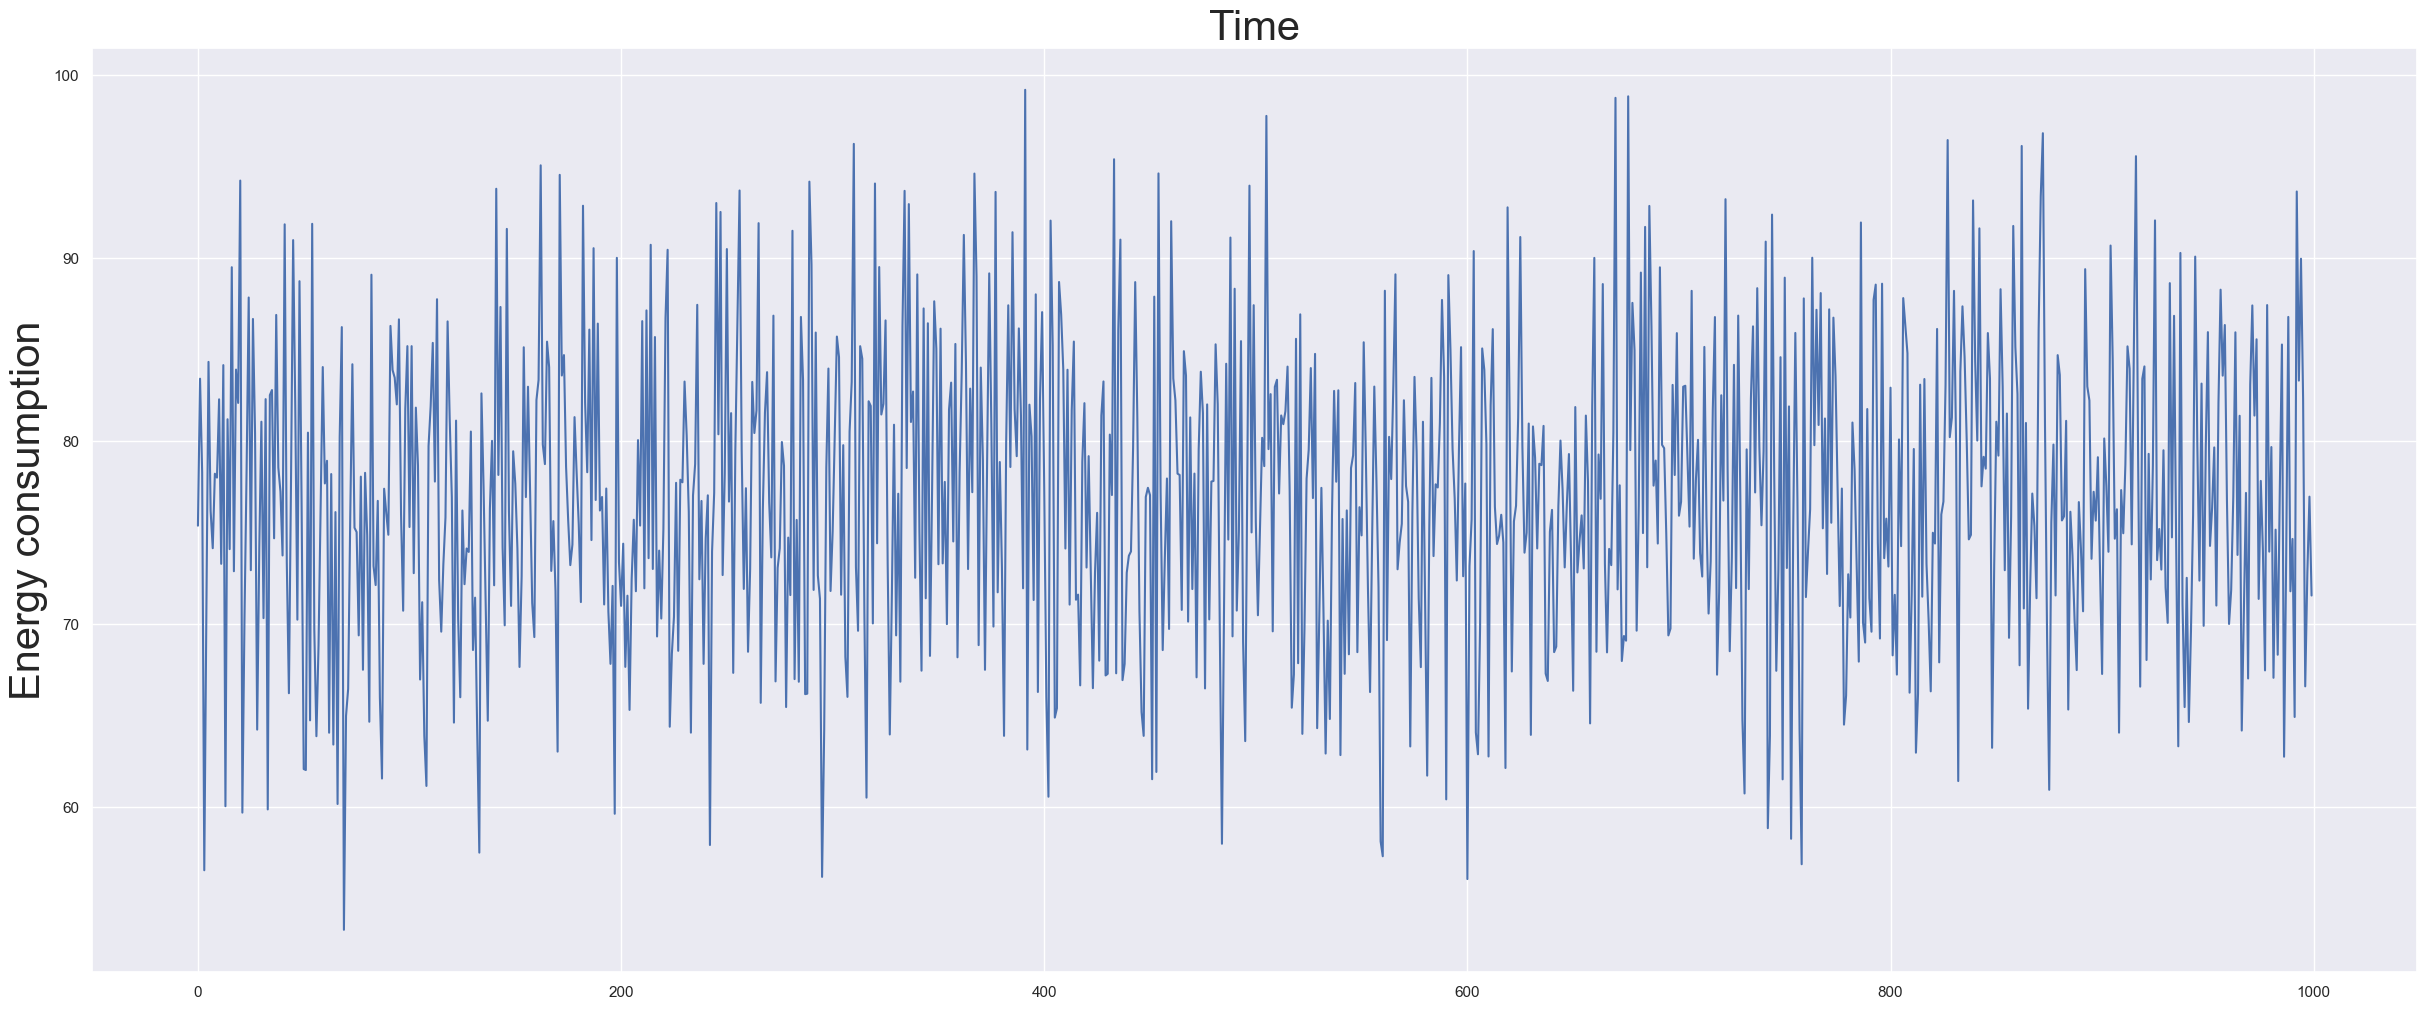

In [42]:
rolling = energy_df['EnergyConsumption'].rolling(24, center =True).mean()
ax = plot_series(energy_df, 'EnergyConsumption', label = 'Hourly', ylabel = 'Energy consumption',
                 title = 'Energy Consumption Hourly')
plt.show()

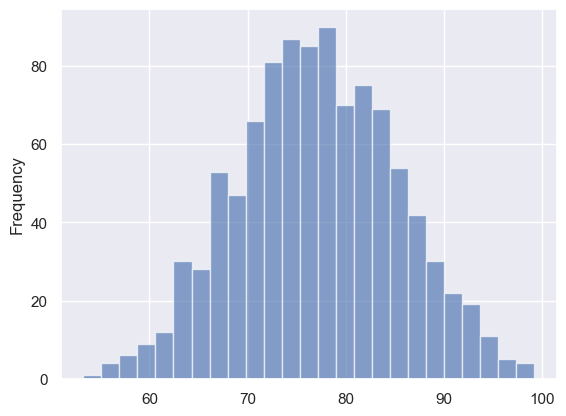

In [43]:
ax = energy_df['EnergyConsumption'].plot.hist(bins = 25, alpha = .65)
plt.show()

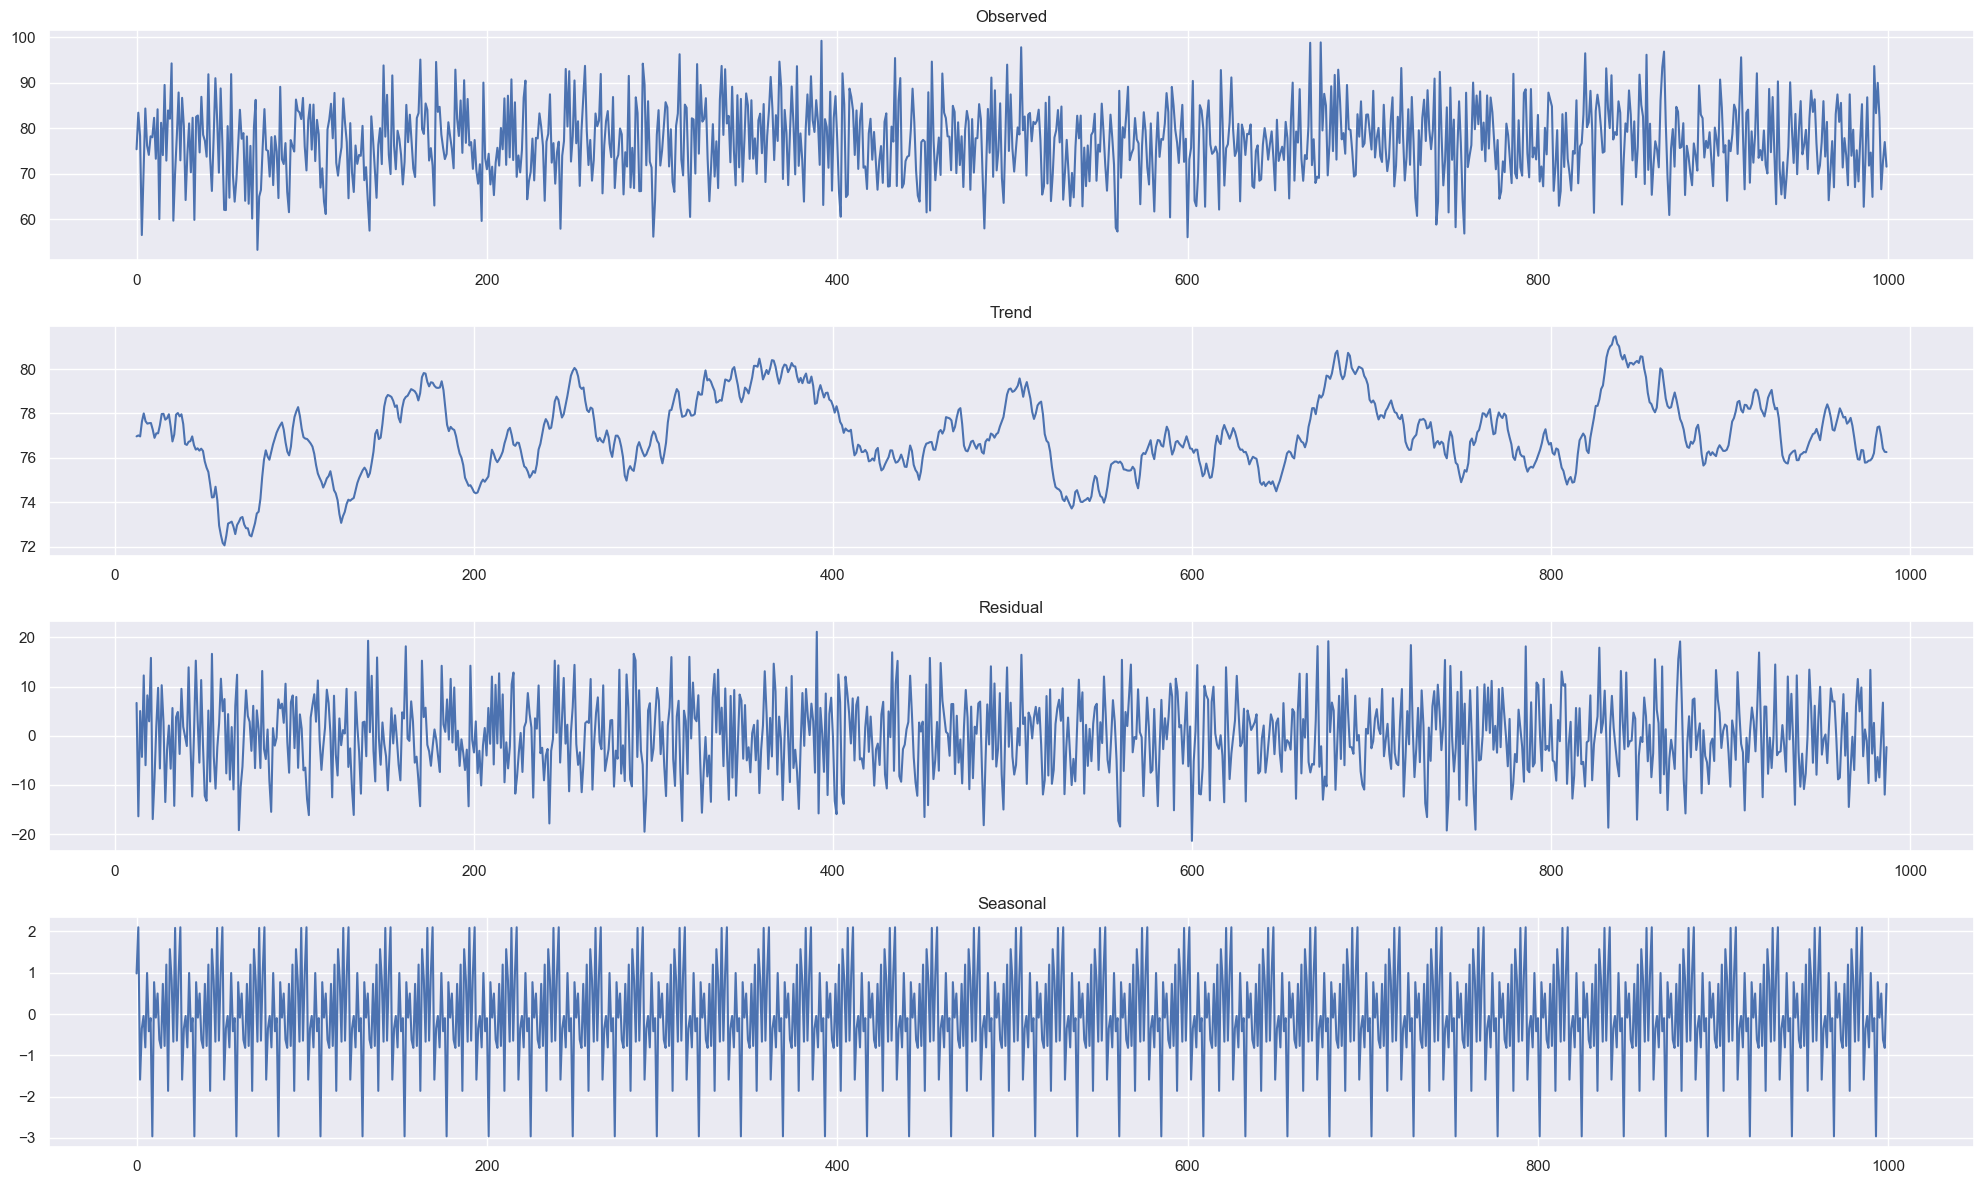

In [44]:


import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(energy_df['EnergyConsumption'], model='additive', period= 24)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
res.observed.plot(ax=ax1, title='Observed')
res.trend.plot(ax=ax2, title='Trend')
res.resid.plot(ax=ax3, title='Residual')
res.seasonal.plot(ax=ax4, title='Seasonal')
plt.tight_layout()
plt.show()

In [45]:
def show_raw_visualizations(data, nrows, width, height):
    #time_data1 = data.index()
    fig, axes = plt.subplots(
    nrows = nrows,ncols = 2, figsize = (width,height), dpi = 80, facecolor = 'w', edgecolor = 'k' 
    )
    colors = ['blue', 'orange', 'green', 'red']
    feature_keys = ['Temperature', 'Humidity', 'RenewableEnergy', 'EnergyConsumption']
    show_raw_visualizations(energy_df[:24*7], nrows = 2, width = 24, height = 12)
    colors = sns.color_palette("husl", len(feature_keys))
    for i in range(len(feature_keys)):
     key = feature_keys[i]
     c = colors[i%(len(colors))]
     t_data = data[key]
     t_data.index = data.index
     t_data.head()
     ax = t_data.plot(
         ax = axes[i//2, i%2],
         color = c,
         title = "{} - {}".format(key, titles[i]),
         rot = 25
                      )
     ax.legends(titles[i])
     plt.tight_layout()

     plt.show()

In [46]:
energy_df.isnull().sum().sum()

0

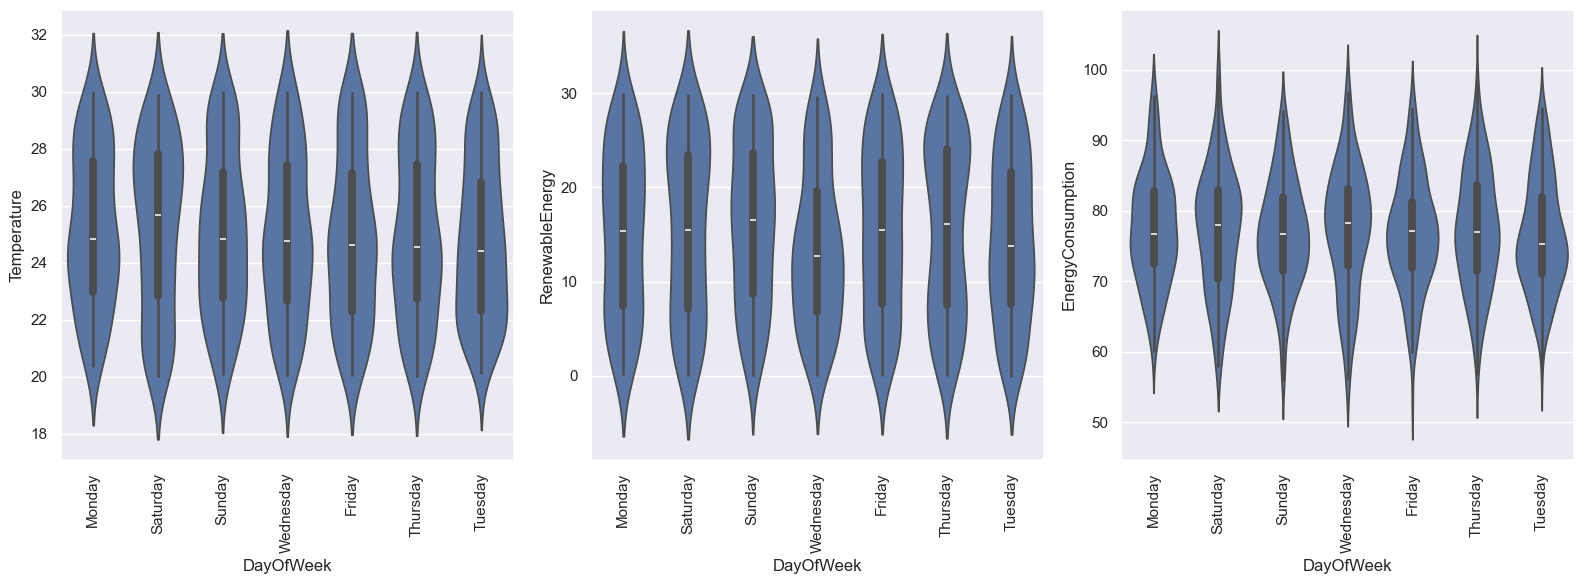

In [47]:
plt.figure(figsize = (16,6))
plt.subplot(1,3,1)
sns.violinplot(x = 'DayOfWeek', y = 'Temperature', data = energy_df)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.subplot(1,3,2)
sns.violinplot(x = 'DayOfWeek', y = 'RenewableEnergy', data = energy_df)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.subplot(1,3,3)
sns.violinplot(x = 'DayOfWeek', y = 'EnergyConsumption', data = energy_df)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [48]:
import plotly.express as px
import plotly.figure_factory as ff
fig = px.box(data_frame = energy_df,
             x = 'EnergyConsumption',
             width = 1000,
             height = 300)
fig.update_layout(template="plotly_dark")
fig.show()


In [49]:
fig = px.box(data_frame = energy_df,
             x = 'RenewableEnergy',
             width = 1000,
             height= 300,
             )
fig.update_layout(template = "plotly_dark")
fig.show()

In [50]:
fig = px.box(data_frame = energy_df,
             x = 'Temperature',
             width = 1000,
             height = 300)
fig.update_layout(template = "plotly_dark")
fig.show()

In [51]:
cat = energy_df.select_dtypes(include = 'object')
cat

,Timestamp,HVACUsage,LightingUsage,DayOfWeek,Holiday
0,2022-01-01 00:00:00,On,Off,Monday,No
1,2022-01-01 01:00:00,On,On,Saturday,No
2,2022-01-01 02:00:00,Off,Off,Sunday,No
3,2022-01-01 03:00:00,Off,On,Wednesday,No
4,2022-01-01 04:00:00,On,Off,Friday,No
...,...,...,...,...,...
995,2022-02-11 11:00:00,Off,Off,Saturday,No
996,2022-02-11 12:00:00,Off,On,Tuesday,Yes
997,2022-02-11 13:00:00,Off,On,Friday,Yes
998,2022-02-11 14:00:00,On,Off,Thursday,Yes


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

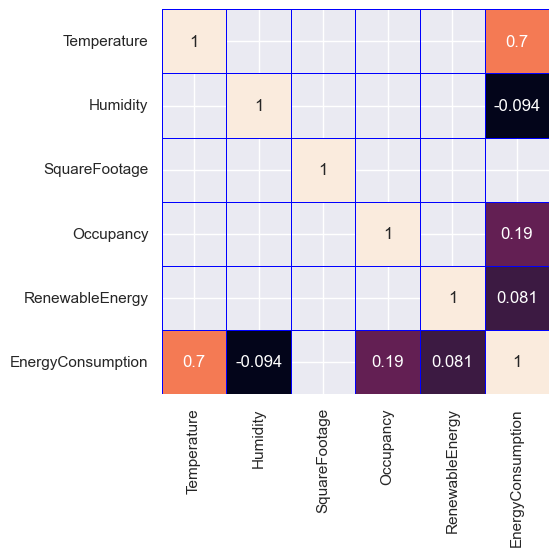

In [58]:
df = energy_df.drop(cat , axis = 1).corr()
plt.figure(figsize = (5,5))
sns.heatmap(df[(df>0.05)|(df<-0.05)], annot = True, cbar = False, linewidth = .5, linecolor = 'blue')
plt.show();

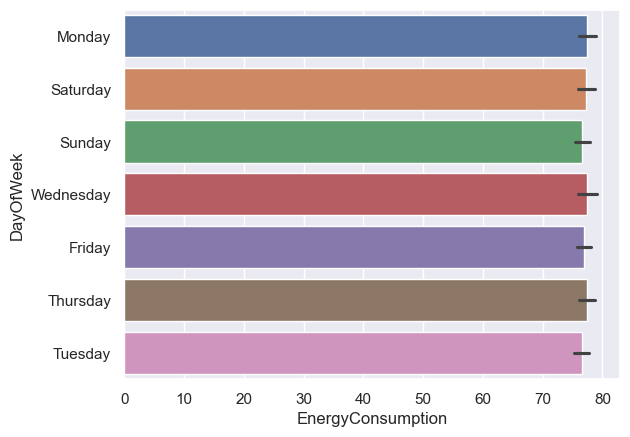

In [64]:
sns.barplot(data = energy_df, y = 'DayOfWeek', x = 'EnergyConsumption', hue = 'DayOfWeek')
plt.show()

In [66]:
energy_df.EnergyConsumption.skew()

0.027398907453860765

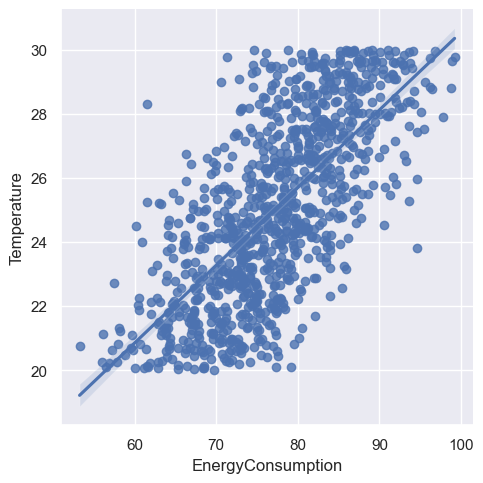

In [67]:
sns.lmplot(x = 'EnergyConsumption', y = 'Temperature', data = energy_df)
plt.show()

In [69]:
energy_df.dtypes

Timestamp             object
Temperature          float64
Humidity             float64
SquareFootage        float64
Occupancy              int64
HVACUsage             object
LightingUsage         object
RenewableEnergy      float64
DayOfWeek             object
Holiday               object
EnergyConsumption    float64
dtype: object

In [ ]:
energy_df.columns

Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')

In [71]:
energy_df

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
995,2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5,Off,Off,21.194696,Saturday,No,82.306692
996,2022-02-11 12:00:00,23.836647,47.256435,1705.235156,4,Off,On,25.748176,Tuesday,Yes,66.577320
997,2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6,Off,On,0.297079,Friday,Yes,72.753471
998,2022-02-11 14:00:00,25.138365,31.306459,1309.079719,3,On,Off,20.425163,Thursday,Yes,76.950389


In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_cols = cat
for col in object_cols:
    le.fit(energy_df[col])
    energy_df[col] = le.transform(energy_df[col])
    

In [81]:
energy_df

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,0,25.139433,43.431581,1565.693999,5,1,0,2.774699,1,0,75.364373
1,1,27.731651,54.225919,1411.064918,1,1,1,21.831384,2,0,83.401855
2,2,28.704277,58.907658,1755.715009,2,0,0,6.764672,3,0,78.270888
3,3,20.080469,50.371637,1452.316318,1,0,1,8.623447,6,0,56.519850
4,4,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,0,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
995,995,28.619382,48.850160,1080.087000,5,0,0,21.194696,2,0,82.306692
996,996,23.836647,47.256435,1705.235156,4,0,1,25.748176,5,1,66.577320
997,997,23.005340,48.720501,1320.285281,6,0,1,0.297079,0,1,72.753471
998,998,25.138365,31.306459,1309.079719,3,1,0,20.425163,4,1,76.950389


In [83]:
from sklearn.preprocessing import LabelEncoder
object_cols = cat
le = LabelEncoder()
for col in object_cols:
    le.fit(energy_df[col])
    energy_df[col] = le.fit_transform(energy_df[col])


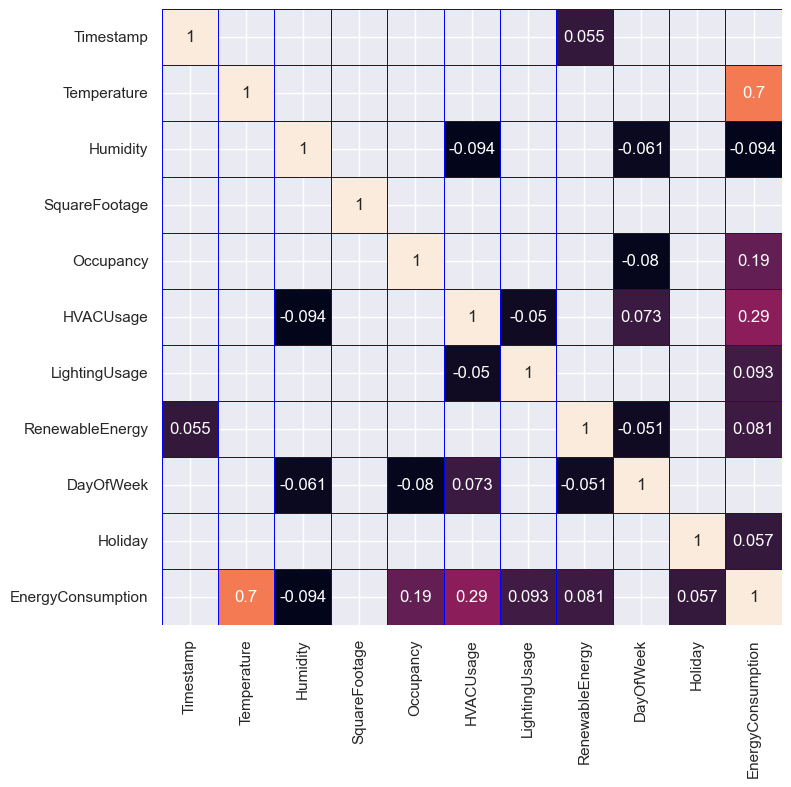

In [85]:
df = energy_df.corr()
plt.figure(figsize = (8,8))
sns.heatmap(df[(df>0.05)|(df<-0.05)], annot = True, cbar = False, linewidth = .5, linecolor ='blue')
plt.show()

In [101]:
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

n_splits = 5

kf = TimeSeriesSplit(n_splits= n_splits)
# Remove the incorrect placeholder and use the correct features list
# features = [y]  # <-- REMOVE THIS LINE
features = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday']
mae_scores = []
for train_idx, val_idx in kf.split(energy_df):
    x_train, x_val = energy_df[features].iloc[train_idx], energy_df[features].iloc[val_idx]
    y_train, y_val = energy_df['EnergyConsumption'].iloc[train_idx],energy_df['EnergyConsumption'].iloc[val_idx]
    model = XGBRegressor(enable_categorical = True)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    
    mae = mean_absolute_error(y_pred, y_val)
    mae_scores.append(mae)
    
mae_scores = np.array(mae_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
    
print(f"\033[031m\033[1m")
print("MAE scores for each fold:", mae_scores)
print(f"\033[034m\033[1m")
print(f"Mean MAE: {mean_mae:.2f} ± {std_mae:.2f}")


MAE scores for each fold: [4.79789324 4.70158302 4.97491826 4.54804933 4.44352155]

Mean MAE: 4.69 ± 0.19


In [104]:
from lightgbm import LGBMRegressor
n_splits =5

kf = TimeSeriesSplit(n_splits = n_splits)
features = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday']
best_params = {
    'n_iter' : 200,
    'verbosity' : -1,
    'colsample_bytree': .989,
    'cplsample_bynode' : .747,
    'max_depth' : 8,
    'learning_rate' :0.098,
    'lambda_l1' : 0.485,
    'lambda_l2' : 0.418,
    'num_leaves' : 159,
    'min_data_in_leaves' : 4    
}

mae_scores = []
for train_idx, val_idx in kf.split(energy_df):
    X_train, X_val = energy_df[features].iloc[train_idx], energy_df[features].iloc[val_idx]
    y_train, y_val = energy_df['EnergyConsumption'].iloc[train_idx], energy_df['EnergyConsumption'].iloc[val_idx]

    model = LGBMRegressor(**best_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    mae = mean_absolute_error(y_val, y_pred)
    mae_scores.append(mae)
    

mae_scores = np.array(mae_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)


print(f"\033[031m\033[1m")
print("MAE scores for each fold:", mae_scores)
print(f"\033[034m\033[1m")
print(f"Mean MAE: {mean_mae:.2f} ± {std_mae:.2f}")


MAE scores for each fold: [4.49145641 4.49562354 4.95843291 4.59755856 4.55144437]

Mean MAE: 4.62 ± 0.17
